In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
etats={0:"S",1:"I",2:"R"}

# 1 - Apprentissage des paramètres d’un modèle à partir de données

### Question 1.1.1

Matrice de transition  :

|     | S   | I   | R   |
|:---:|:---:|:---:|:---:|
| S   | 2/3 | 1/3 |  0  |
| I   | 0   | 5/6 | 1/6 |
| R   | 0   | 0   | 1   |

\
On l'obtient en comptant le nombre de transitions d'un état vers un autre. On constate que la somme des lignes de la matrice vaut bien 1 pour chaque ligne.

In [ ]:
print("P(S/S) = "+str(2/3))
print("P(S/I) = "+str(1/3))
print("P(S/R) = "+str(0))
print("P(I/S) = "+str(0))
print("P(I/I) = "+str(5/6))
print("P(I/R) = "+str(1/6))
print("P(R/S) = "+str(0))
print("P(R/I) = "+str(0))
print("P(R/R) = "+str(1))

P(S/S) = 0.6666666666666666
P(S/I) = 0.3333333333333333
P(S/R) = 0
P(I/S) = 0
P(I/I) = 0.8333333333333334
P(I/R) = 0.16666666666666666
P(R/S) = 0
P(R/I) = 0
P(R/R) = 1


### Question 1.2.1

In [ ]:
#Charge le jeu de données
data = np.loadtxt('data_exo_2022.txt', dtype=int)
#Lire les données les stockent en data(list[int])


### Question  1.2.2

In [ ]:
matrice_transitions = np.zeros((3,3))

#Compte le nombre de transitions entre chaque états
for individu in data :
	for i in range(0, len(individu) - 1) :
		matrice_transitions[individu[i]][individu[i + 1]] += 1

#Calcule la probabilité de transition entre les états
for l in range(0, len(matrice_transitions)) :
	somme_ligne = sum(matrice_transitions[l])
	for c in range(0, len(matrice_transitions[l])) :
		matrice_transitions[l][c] = matrice_transitions[l][c] / somme_ligne

print(matrice_transitions)

[[0.93082918 0.06917082 0.        ]
 [0.         0.93518148 0.06481852]
 [0.04065945 0.         0.95934055]]


# 2 - Description du premier modèle

### Question 2.1.1

Matrice de transition A :

|     | S   | I   | R   |
|:---:|:---:|:---:|:---:|
| S   | 0,92 | 0,08 |  0  |
| I   | 0   | 0,93 | 0,07 |
| R   | 0   | 0   | 1   |

In [ ]:
def verifie_matrice_stochastique(matrice) :
    '''Vérifie si la matrice donnée en argument est stochastique
    :param matrice: la matrice de transitions 
    :return: un booléen True si la matrice est stochastique, False sinon
    '''
    for l in range(0, len(matrice)) :
        somme_ligne = sum(matrice[l])
        
        if (round(somme_ligne,2) != 1) :
            return False
    return np.amax(matrice) <= 1 and np.amin(matrice) >= 0 

#Tests
assert(verifie_matrice_stochastique(matrice_transitions)==True)
matrice_test = matrice_transitions.copy()
matrice_test[0][0] = 1.5
matrice_test[0][1] = -0.5
assert(verifie_matrice_stochastique(matrice_test)==False)

La fonction ci-dessus nous assure que la matrice est bien stochastique en vérifiant que toutes les probabilités sont comprises entre 0 et 1 et que la somme des probabilités de chaque ligne vaut bien 1.

### Question 2.1.2
On se réfère à l'énoncé : Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.\
On obtient le vecteur de la distribution initiale suivant :\
$\pi_0 = (0.9, 0.1, 0)$

## 2.2 - Distribution $\pi_t$

### Question 2.2.1
On suppose que la chaîne de Markov est homogène. On peut alors écrire :\
$\pi_n = \pi_{n-1} * A$ \
\
Donc $\pi_1 = \pi_0 * A = (0.8377, 0.1557, 0.0064)$

### Question 2.2.2
$\pi_2 = \pi_1 * A = (0.7800, 0.2036, 0.0163)$

### Question 2.2.3


In [ ]:
pi = np.array([0.9, 0.1, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi]

for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

pi = np.array([0.9, 0.1, 0])

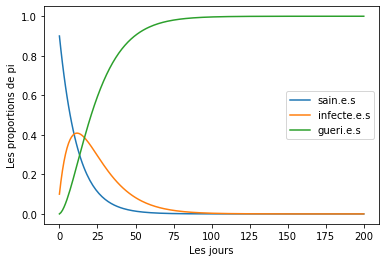

In [ ]:
plt.plot(pi_liste)
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.show()

On observe que la convergence de la distribution est achevée aux alentours du temps 100. La probabilité d'être guéri tend alors vers 1, et les deux autre probabilités vers 0.\
Le fait que l'ensemble de la population est dans l'état guéri après convergence est attendu puisque l'état guéri est **absorbant**.

## 2.3 - Tirage aléatoire des états

In [ ]:
def genere_aleatoirement(n):
    s0 = random.random()
    if s0 < pi[0] :
        s0 = 0
    else :
        s0 = 1
    liste_etats = [s0]
    for i in range(1,n) :
        etat_prec=liste_etats[i-1]
        ligne_probas=A[etat_prec]
        etat_actuel=random.random()
        if etat_actuel<ligne_probas[0]:
            liste_etats.append(0)
        else:
            if etat_actuel<ligne_probas[0]+ligne_probas[1]:
                liste_etats.append(1)
            else:
                liste_etats.append(2)
    
    return liste_etats
	


In [ ]:
liste_etat=genere_aleatoirement(150)
for state in liste_etat:
            print(etats[state])

S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
I
I
I
I
I
I
I
I
I
I
I
I
I
I
I
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R
R


## 2.4 - Modélisation d’une population

In [ ]:
def genere_n_personne(n,showgraph=True,affichage=True,retourne=True):
    liste_genere_individu=[]#Une liste où on stocke l'état d'un individu
    for i in range(n):
        liste_genere_individu.append(genere_aleatoirement(150))
    liste_moyenne_etat=[]
    for i in range(150):
        etat_temps_i=[0,0,0]
        for j in range(n):
            etats_au_temps_i_de_personne_j=liste_genere_individu[j][i]
            etat_temps_i[etats_au_temps_i_de_personne_j]+=1
        if(affichage):
            print("Au temps "+str(i)+": \n")
            print("Il y a "+str(etat_temps_i[0]/n*100)+" pourcent de gens sains \n")
            print("Il y a "+str(etat_temps_i[1]/n*100)+" pourcent de gens infectés \n")
            print("Il y a "+str(etat_temps_i[2]/n*100)+" pourcent de gens guéris \n")
        liste_moyenne_etat.append(etat_temps_i)
    if showgraph:
        plt.plot(liste_moyenne_etat)
        plt.xlabel("Les jours")
        plt.ylabel("Le nombre d'individus")
        plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
        plt.show()
    if retourne :
        return liste_genere_individu

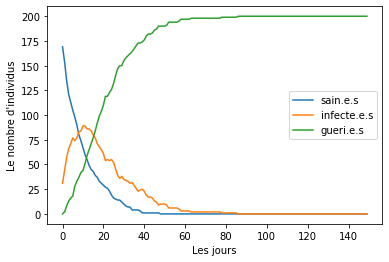

In [ ]:
genere_n_personne(200,True,False, False)

In [ ]:
#Pour avoir la distrubition des gens infectés dans 200 personnes.
genere_n_personne(200,False,True,False)

Au temps 0: 

Il y a 90.0 pourcent de gens sains 

Il y a 10.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 1: 

Il y a 80.5 pourcent de gens sains 

Il y a 19.0 pourcent de gens infectés 

Il y a 0.5 pourcent de gens guéris 

Au temps 2: 

Il y a 78.0 pourcent de gens sains 

Il y a 21.0 pourcent de gens infectés 

Il y a 1.0 pourcent de gens guéris 

Au temps 3: 

Il y a 71.5 pourcent de gens sains 

Il y a 25.5 pourcent de gens infectés 

Il y a 3.0 pourcent de gens guéris 

Au temps 4: 

Il y a 66.5 pourcent de gens sains 

Il y a 29.5 pourcent de gens infectés 

Il y a 4.0 pourcent de gens guéris 

Au temps 5: 

Il y a 61.5 pourcent de gens sains 

Il y a 33.0 pourcent de gens infectés 

Il y a 5.5 pourcent de gens guéris 

Au temps 6: 

Il y a 58.5 pourcent de gens sains 

Il y a 35.0 pourcent de gens infectés 

Il y a 6.5 pourcent de gens guéris 

Au temps 7: 

Il y a 50.5 pourcent de gens sains 

Il y a 39.0 pourcent de gens infectés 

Il y a 10.5 p

A t=60, on voit que le nombre de personnes saines s'approche de 0. \
A t=80, on voit que le nombre de personnes saines et infectés sont à 0. \
Lorsque t est grand (t > 100), l'ensemble de la population est guérie. \
Il apparait que la modélisation suit d'assez près la distribution théorique calculée précedemment.

Au temps 0: 

Il y a 100.0 pourcent de gens sains 

Il y a 0.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 1: 

Il y a 100.0 pourcent de gens sains 

Il y a 0.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 2: 

Il y a 100.0 pourcent de gens sains 

Il y a 0.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 3: 

Il y a 80.0 pourcent de gens sains 

Il y a 20.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 4: 

Il y a 60.0 pourcent de gens sains 

Il y a 40.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 5: 

Il y a 40.0 pourcent de gens sains 

Il y a 60.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 6: 

Il y a 40.0 pourcent de gens sains 

Il y a 60.0 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 7: 

Il y a 40.0 pourcent de gens sains 

Il y a 60.0 pourcent de gens infectés 

Il y a 0.0 po

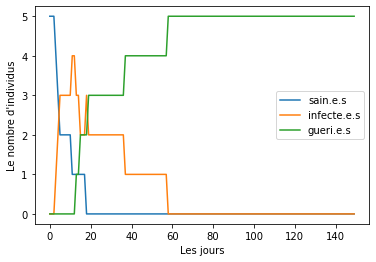

In [ ]:
genere_n_personne(5, retourne=False)

Au temps 0: 

Il y a 89.98 pourcent de gens sains 

Il y a 10.02 pourcent de gens infectés 

Il y a 0.0 pourcent de gens guéris 

Au temps 1: 

Il y a 83.16 pourcent de gens sains 

Il y a 15.920000000000002 pourcent de gens infectés 

Il y a 0.9199999999999999 pourcent de gens guéris 

Au temps 2: 

Il y a 76.82 pourcent de gens sains 

Il y a 21.32 pourcent de gens infectés 

Il y a 1.8599999999999999 pourcent de gens guéris 

Au temps 3: 

Il y a 70.19999999999999 pourcent de gens sains 

Il y a 26.540000000000003 pourcent de gens infectés 

Il y a 3.26 pourcent de gens guéris 

Au temps 4: 

Il y a 64.44 pourcent de gens sains 

Il y a 30.599999999999998 pourcent de gens infectés 

Il y a 4.96 pourcent de gens guéris 

Au temps 5: 

Il y a 59.199999999999996 pourcent de gens sains 

Il y a 33.660000000000004 pourcent de gens infectés 

Il y a 7.140000000000001 pourcent de gens guéris 

Au temps 6: 

Il y a 54.279999999999994 pourcent de gens sains 

Il y a 36.120000000000005 pource


Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 127: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 128: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 129: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 130: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 131: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 132: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a 99.98 pourcent de gens guéris 

Au temps 133: 

Il y a 0.0 pourcent de gens sains 

Il y a 0.02 pourcent de gens infectés 

Il y a

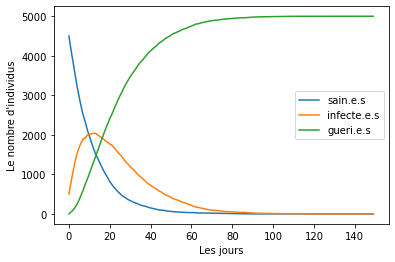

In [ ]:
genere_n_personne(5000, retourne=False)

Plus la population de notre modélisation est élevée, plus la distribution observée s'approche de la distribution théorique.

## 2.5 - Longueur de l’infection

### Question 2.5.1

In [ ]:
def moyenne_longueur_infection(n) :
	liste_genere_individu = genere_n_personne(n, False, False, True)
	somme = 0
	for etats_individu in liste_genere_individu :
		somme += etats_individu.count(1)
	return somme / len(liste_genere_individu)

In [ ]:
moyenne_longueur_infection(2000)

14.1385

La longueur moyenne d'une séquence I pour une population simulée de 2000 individus est d'environ 14, ce qui signifie que la durée moyenne d'infection est de 14 jours.

### Question 2.5.2

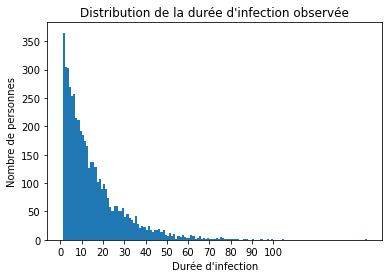

In [ ]:
temps_infecte = []
liste_genere_individu = genere_n_personne(5000, False, False, True)
for etats_individu in liste_genere_individu :
	temps_infecte.append(etats_individu.count(1))
plt.hist(temps_infecte, bins=np.arange(min(temps_infecte), max(temps_infecte) + 1, 1))
plt.xticks(np.arange(0,101,step=10))
plt.title("Distribution de la durée d'infection observée")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre de personnes")
plt.show()

La distribution observée de la longueur d'infection laisse penser qu'elle suit une loi géométrique.

### Question 2.5.3

Espérance de la loi géométrique = 1 / p\
Ici on a p = 0.07 la probablité d'être guéri sachant qu'on est infecté.\
p = p(guéri | infecté) = 0.07\
La longueur de la sequence I dépend de la probabilité p puisque la séquence prend fin dès que l'individu est guéri.\
\
Donc, longueur théorique d’une séquence de I = 1 / 0.07 = 14.29

### Question 2.5.4 et 2.5.5

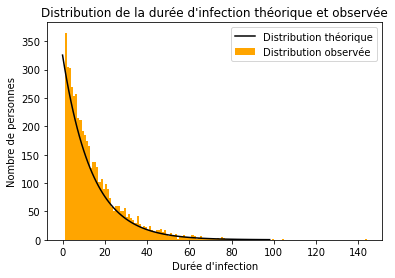

In [ ]:
probas_temps_infecte = []
t_i=1
for temps in range(1,100):
    t_i=0.93 ** temps * 0.07
    probas_temps_infecte.append(t_i*5000)

plt.plot(probas_temps_infecte,color="black")
plt.hist(temps_infecte, bins=np.arange(min(temps_infecte), max(temps_infecte) + 1, 1),color="orange")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre de personnes")
plt.title("Distribution de la durée d'infection théorique et observée")
plt.legend(["Distribution théorique","Distribution observée"])
plt.show()


La superposition graphique montre clairement que la distribution observée est très proche de la théorique. La modélisation de la durée d'infection par une loi géométrique est donc appropriée.

## 2.6 - Modifications du modèle

Commençons par voir si la **taille de la population** notée `n` a un impact sur la propagation de l'épidémie.

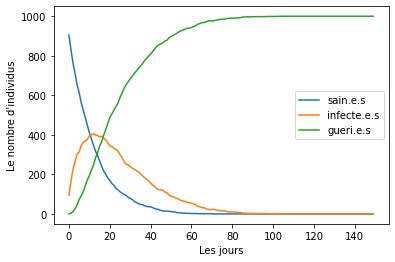

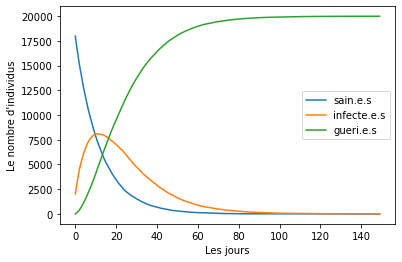

In [ ]:
genere_n_personne(1000,True,False,False)
genere_n_personne(20000,True,False,False)
genere_n_personne(500000,True,False,False)

Nous remarquons bien sur les graphes obtenus ci-dessus que la taille d'une population influe sur le nombre mais pas sur la **proportion** de personnes saines, infectées et guéries: les 3 courbes gardent la même tendance pour des `n > 50`. Bien sûr si l'on prend des `n` petits (par exemple `n = 5`) alors les courbes n'auront plus la même tendance mais les proportions d'individus dans chaque catégorie resteront néanmoins plus ou moins respectées.

In [ ]:
genere_n_personne(20000,True,False,False)

Essayons ensuite de modifier la distribution de probabilité initiale.

In [ ]:
pi=np.array([0.99,0.01,0])
genere_n_personne(20000,True,False,False)

In [ ]:
pi= np.array([0.8,0.2,0])
genere_n_personne(20000,True,False,False)

In [ ]:
pi= np.array([0.5,0.5,0])
genere_n_personne(20000,True,False,False)

Modifier la distribution de probabilité initiale n'impacte pas réellement la convergence. Qu'importe la distribution initiale, la simulation finit toujours par converger vers la distribution théorique, ce qui laisse penser que la chaîne de Markov est **ergodique**.

Ci-dessous on observe ce qu'il se passe lorsque les probabilités de transition sont modifiées.

In [ ]:
pi=np.array([0.9,0.1,0])
#On diminue la proportion de devenir guéri en étant infecté
A=np.array([[0.92, 0.08, 0],[0, 0.99, 0.01],[0, 0, 1]])
genere_n_personne(20000,True,False,False)

In [ ]:
#On augmente la probabilité de devenir infecté en étant sain
A=np.array([[0.7, 0.3, 0],[0, 0.93, 0.07],[0, 0, 1]])
genere_n_personne(20000,True,False,False)

On voit que changer les probabilités de transition peut altérer la vitesse de convergence ou même la distribution vers laquelle la simulation converge.

# 3 - Description du second modèle

## 3.1 - Analyse du modèle

### Question 3.1.1

Oui, ce processus peut être modélisé par une chaine Markov :
1) Le processus est homogène. Il conserve les probabilités indépendamment du temps.
2) Il y a 3 états. Donc le nombre d'états est fini.
3) L'état au temps t+1 ne dépend que de l'état au temps t.

### Question 3.1.2

Matrice de transition  :

|     | S   | I   | R   |
|:---:|:---:|:---:|:---:|
| S   | 0.92| 0.08|  0  |
| I   | 0   | 0.93| 0.07|
| R   | 0.02| 0   | 0.98|

### Question 3.1.3

Elle est apériodique car il y a des cycles dans le graphe. \
Elle est irréductible car tous les états sont communiquants.

### Question 3.1.4

La matrice $A^2$ correspond à la matrice de transition au temps t+2. Avec cette matrice on peut avoir une chaine Markov d'ordre 2.\
La matrice $A^3$ correspond à la matrice de transition au temps t+3. Avec cette matrice on peut avoir une chaine Markov d'ordre 3.\
La matrice $A^4$ correspond à la matrice de transition au temps t+4. Avec cette matrice on peut avoir une chaine Markov d'ordre 4.

In [ ]:
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
A_2=np.dot(A,A)
A_3=np.dot(A,A_2)
A_4=np.dot(A,A_3)


assert(verifie_matrice_stochastique(A)==True)
assert(verifie_matrice_stochastique(A_2)==True)
assert(verifie_matrice_stochastique(A_3)==True)
assert(verifie_matrice_stochastique(A_4)==True)

Nous confirmons que chacune de ces matrices est stochastique à l'aide de la fonction écrite précedemment.

### Question 3.1.5

In [ ]:
pi = np.array([1, 0, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

plt.plot(pi_liste)
plt.title('Répartition théorique des effectifs')
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.show()
pi = np.array([0.9, 0.1, 0])

En réalisant des simulations avec la même distribution de probabilité initiale que précédemment et les probabilités de transition du second modèle, on constate que la répartition théorique des effectifs est différente de celle du premier modèle. Elle se stabilise aux alentours de t+60 avec un peu plus de 60% de guéris et près de 20% d'infectés ainsi qu'un peu moins de 20% de sains.\
Avec ce nouveau modèle, il n'y a jamais d'instant où l'ensemble de la population est guérie il y a toujours une partie de la population contaminée, et une partie non immunisée à la maladie. Ce résultat est attendu suite à l'ajout d'une probabilité de 2% de passer de l'état guéri à l'état sain, représentant une perte d'immunité. L'état guéri n'est plus **absorbant**, une partie des effectifs va donc s'en échapper pour "alimenter" les effectifs sains et infectés.

In [ ]:
genere_n_personne(2000, True, False, False)

La distribution observée sur un échantillon de 2000 personnes concorde avec la distribution théorique donnée plus haut. Après t+60, un peu plus de 60% des personnes sont guéries, près de 20% sont infectées et près de 20% saines.

In [ ]:
temps_infecte = []
liste_genere_individu = genere_n_personne(2000, False, False, True)
for etats_individu in liste_genere_individu :
	temps_infecte.append(etats_individu.count(1))
plt.hist(temps_infecte, bins=np.arange(min(temps_infecte), max(temps_infecte) + 1, 1))
plt.title("Distribution de la durée d'infection")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre d'individus")
plt.show()

### Question 3.1.6

In [ ]:
#Simulation avec 90% d'infectés et 10% de sains
pi = np.array([0.1, 0.9, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()

In [ ]:
#Simulation avec 50% d'infectés et 50% de sains
pi = np.array([0.5, 0.5, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()

In [ ]:
#Simulation avec 10% d'infectés et 90% de guéris
pi = np.array([0, 0.1, 0.9])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()

Qu'importe la distribution de probabilité initiale, la distribution théorique tend toujours à se stabiliser sur les mêmes effectifs d'un peu plus de 60% de guéris, près de 20% d'infectés, et un peu moins de 20% de sains. La chaîne de Markov est **ergodique**, on converge vers une certaine distribution stationnaire quelque que soit la distribution initiale.\
Nous avons déjà énoncé les propriétés de cette chaîne de Markov qui font qu'elle est ergodique, elle est :
- Irréductible
- Apériodique
- Récurrente positive

### Question 3.1.7

Comme la chaîne de Markov est ergodique, la distribution de probabilité $(\pi^{(n)})_{n \in N}$ converge vers $\pi^*$ la distribution stationnaire quelque soit $\pi^0$ la distribution initiale. \
Avec $\pi^*$ qui vérifie : \
$\pi^* = \pi^* \cdot A$ où A est la matrice de transition \
$\pi^* \cdot 1 = 1$ \
\
On a donc : \
$\pi^* = (a,b,c) = (a,b,c) \cdot A$ \
Ce qui nous donne le système d'équation suivant à résoudre : \
\
$a = 0.92a + 0.02c$ \
$b = 0.08a + 0.93b$ \
$c = 0.07b + 0.98c$ \
$a + b + c = 1$ \
\
$0.08a = 0.02c$ \
$0.07b = 0.08a$ \
$0.02c = 0.07b$ \
$a + b + c = 1$ \
\
$a = 0.25c$ \
$0.07b = 0.08a$ \
$0.02c = 0.07b$ \
$0.25c + b + c = 1$ \
\
$a = 0.25c$ \
$0.07b = 0.08a$ \
$0.02c = 0.07 \cdot (1 - 1.25c)$ \
$b = 1 - 1.25c$ \
\
$a = 0.25c$ \
$0.07b = 0.08a$ \
$0.02c = 0.07 - \frac{7}{80}c$ \
$b = 1 - 1.25c$ \
\
$a = 0.25 \cdot \frac{28}{43}$ \
$0.07b = 0.08a$ \
$c = \frac{28}{43}$ \
$b = 1 - 1.25 \cdot \frac{28}{43}$ \
\
$a = \frac{7}{43}$ \
$b = \frac{8}{43}$ \
$c = \frac{28}{43}$ \
\
La distribution stationnaire est donc la suivante : 16.28% de sains, 18.6% d'infectés et 65.12% de guéris. \
Ce qui coincide avec les résultats des simulations précédentes qui oscillent autour de ces valeurs.



## 3.2 - Longueur de l'immunité

### Question 3.2.1

In [ ]:
def moyenne_longueur_immunite(n) :
	liste_genere_individu = genere_n_personne(n, False, False, True)
	somme = 0
	for etats_individu in liste_genere_individu :
		somme += etats_individu.count(2)
	return somme / len(liste_genere_individu)


In [ ]:
sum = 0
count = 0
for i in range(1,50) :
	sum += moyenne_longueur_immunite(5000)
	count += 1
print(sum / count)

La longueur moyenne d'une séquence de R est aux alentours de 106 périodes. C'est à dire que la longueur moyenne observée de la durée d'immunité dans une simulation avec 5000 individus est de 106 jours.

In [ ]:
temps_immunise = []
liste_genere_individu = genere_n_personne(5000, False, False, True)
for etats_individu in liste_genere_individu :
	temps_immunise.append(etats_individu.count(2))
plt.hist(temps_immunise, bins=np.arange(min(temps_immunise), max(temps_immunise) + 1, 1))
plt.title('Distribution observée de la longueur d\'immunité')
plt.ylabel("Nombre d'individus")
plt.xlabel("Durée d'immunité en jours")
plt.show()

### Question 3.2.2

La longueur d'immunité semble suivre une loi normale. Nous utiliserons donc l'espérance d'une loi normale pour calculer la longueur théorique de la durée d'immunité. \
Pour une loi normale l'espérance est égale à la moyenne, et la meilleure aproximation de moyenne dont nous disposons est celle générée par simulation, c'est à dire une moyenne d'à peu près 106. \
On peut donc conclure que la longueur d'immunité théorique est de 106 jours.

### Question 3.2.3

Nous calculons ensuite la variance d'échantillon qui est le meilleur estimateur de variance dont nous disposons pour modéliser la distribution théorique.

In [ ]:
def variance_longueur_immunite(n) :
	liste_genere_individu = genere_n_personne(n, False, False, True)
	somme_ecarts_carre = 0
	for etats_individu in liste_genere_individu :
		nb_jours_immunite = etats_individu.count(2)
		somme_ecarts_carre += (nb_jours_immunite - 106)**2
	return somme_ecarts_carre / len(liste_genere_individu)

In [ ]:
sum = 0
count = 0
for i in range(1,50) :
	sum += variance_longueur_immunite(5000)
	count += 1
print(sum / count)

On trouve une variance d'environ 549 pour la moyenne 106 et une population de 5000 individus.

In [ ]:
probas_temps_immunise = []
ecart_type = math.sqrt(549)
t_i=1
for temps in range(1,150):
    t_i = (1 / (ecart_type * math.sqrt(2 * math.pi))) * math.exp((-1 / (2 * 549)) * (temps - 106)**2)
    probas_temps_immunise.append(t_i*5000)

plt.plot(probas_temps_immunise, color="black")
plt.hist(temps_immunise, bins=np.arange(min(temps_immunise), max(temps_immunise) + 1, 1),color="orange")
plt.xlabel("Durée d'immunité")
plt.ylabel("Nombre de personnes")
plt.title("Distribution de la durée d'immunité théorique et observée")
plt.legend(["Distribution théorique","Distribution observée"])
plt.show()


En superposant les graphes de la distribution théorique et observée, on constate que les deux distribution sont assez proches, la modélisation théorique avec une loi normales dont les paramètres sont estimés à partir de l'échantillon semble correcte.

## Question 3.3 - Modifier le modèle

### Question 3.3.1

In [ ]:
#Simulation avec 100% de sains au départ et une probabilité 30% pour un individu sain de devenir infecté
pi = np.array([1, 0, 0])
A = np.array([[0.7, 0.3, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()
print(pi_liste[-1])

In [ ]:
#Simulation avec 100% de sains au départ et une probabilité 90% pour un individu sain de devenir infecté
pi = np.array([1, 0, 0])
A = np.array([[0.1, 0.9, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi]
for i in range(1, 201) :
	pi = np.dot(pi, A)
	pi_liste.append(pi)

plt.plot(pi_liste)
plt.legend(('sain.e.s','infecte.e.s','gueri.e.s'))
plt.ylabel("Les proportions de pi")
plt.xlabel("Les jours")
plt.show()
print(pi_liste[-1])

Lorsque la probabilité pour un individu sain de devenir infecté augmente on voit clairement que la croissance du nombre d'infecté explose et que le pic d'infection est plus haut. Une fois le pic atteint, les cas d'infections chutent d'autant plus brutalement. \
On constate aussi que les effectifs d'individus sains s'effondrent dès que la distribution s'équilibre, au profit des effectifs d'individus guéris et infectés. \
En d'autres termes, plus la maladie est contagieuse, plus haut et bref sera le pic d'infection, et lorsque le modele se stabilise, plus grande sera la part d'individus guéris et faible celle des sains. Pour que la progression de l'épidémie soit stoppée, une plus grande partie de la population doit être immunisée.

# Question 4 - Confinement

In [ ]:
matrice_transition_sans_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
matrice_transition_avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])

def simulation_confinement(taille_pop, duree_simu):
    etats_individus = []
    matrice_transition = matrice_transition_sans_confinement
    nb_individus_infectes = 0
    evolution_nb_infectes = []
    temps_confinement = []
    confinement = False

    #initialisation, tous les individus sont sains
    for i in range(0, taille_pop):
        etats_individus.append([0])

    for t in range(0, duree_simu) :

        #Vérifie s'il faut débuter ou terminer une période de confinement
        part_individus_infectes = nb_individus_infectes / taille_pop
        if confinement == False and part_individus_infectes >= 0.25 :
            #Début confinement
            temps_confinement.append(t)
            matrice_transition = matrice_transition_avec_confinement
            confinement = True
        elif confinement == True and part_individus_infectes < 0.1 :
            #Fin confinement
            temps_confinement.append(t)
            matrice_transition = matrice_transition_sans_confinement
            confinement = False

        #pour chaque individu, choisit un nouvel état
        for i in range(0, taille_pop):
            etat_prec = etats_individus[i][t]
            probas_transition = matrice_transition[etat_prec]
            rand = random.random()
            if rand < probas_transition[0]:
                nouvel_etat = 0
            elif rand < probas_transition[0] + probas_transition[1]:
                    nouvel_etat = 1
            else:
                    nouvel_etat = 2
            etats_individus[i].append(nouvel_etat)

            #compte le nombre d'infectés
            if (etat_prec != 1 and nouvel_etat == 1) :
                nb_individus_infectes += 1
            elif (etat_prec == 1 and nouvel_etat != 1) :
                nb_individus_infectes -= 1

        evolution_nb_infectes.append(nb_individus_infectes/taille_pop)
    
    #Affiche les résultats graphiquement
    plt.plot(evolution_nb_infectes)
    plt.title('Évolution de la part d\'infectés avec confinements')
    count = 1
    for t in temps_confinement:
        if count % 2 == 1 :
            plt.axvline(x=t, color="red", ls='--') #rouge = début de confinement
            print("Au temps "+str(t)+" début de "+str(count//2 +1)+"ième confinement")
        else :
            plt.axvline(x=t, color="green", ls='--') #vert = fin de confinement
            print("Au temps "+str(t)+" fin de "+str(count//2)+"ième confinement")
        count += 1
    plt.legend(["Nombre de l'infecté","Debut de confinement","Fin de confinement"])
    plt.xlabel("Les jours")
    plt.ylabel("Le proportion des gens infectés")

simulation_confinement(1000000, 200)

Sur le schéma ci-dessus, la part d'infectés dans la populaiton est représentée ainsi que les débuts de période de confinement en rouge, et les fins de confinements en vert. On constate qu'entre 4 et 5 confinements sont généralement nécessaires avant que la part d'infectés ne commence à se stabiliser sous les 20% et ne plus jamais dépasser les 25%. \
\
Il est intéressant de noter qu'en retirant le méchanisme de confinement la part d'infectés finit par se stabiliser encore plus rapidement mais après un pic d'infection bien plus important de près de 40%. \
La vitesse de convergence du modèle est liée au nombre de d'invidus qui sont arrivés dans l'état guéri et qui ont moins de chances d'être infectés. Si la majorité de la population se trouve dans cet état la part des infectés va stagner. Les confinements ralentissent cette convergence mais assurent que les pics d'infection restent maîtrisés.

# Question 5-Discussion


Ce modèle pose beaucoup de limites qui font qu'il serait très peu applicable dans la vie réelle:

- il ne prend pas en compte certaines catégories de personnes, comme les personnes qui sont infectées mais pas tout de suite contagieuses (donc pas exactement classables dans I), celles qui meurent des suites de la maladie, le degré de contagiosité (dépendant de la charge virale), la contagiosité en elle-même

- ce modèle prend en compte une probabilité d'être infecté sans lien avec les facteurs environnementaux auxquels les individus sont exposés. Ainsi il ne reflète pas le fait qu'un individu en contamine d'autres, le nombre de nouveaux contaminés en fonction de l'exposition des individus déjà contaminés à une population saine. Il ne permet pas non plus de voir l'impact d'une mise en quarantaine ou au contraire d'une sur-exposition aux facteurs de risques (individus infectés).

On pourrait remédier à certains de ces problèmes:

- en rajoutant de nouveaux états autres que `S`, `I` et `R`: par exemple une catégorie pour les personnes infectées mais en période d'incubation, les personnes qui décèdent de l'épidémie, celles qui développent une immunité en guérissant, celles qui sont porteuses de maladie mais sans symptômes, etc...
- en prenant en compte l'âge ou autres facteurs de contagiosité (par exemple: un jeune enfant transmet plus facilement un virus, une personne âgée développe souvent une forme grave, etc...)
- en prenant en compte les contacts entre individus, les déplacements, etc...